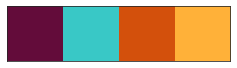

In [39]:
from typing import NamedTuple
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [40]:
songs = pd.read_csv(".\dataset\mySongsDataset.csv")

songs.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2889 non-null   object 
 1   artist        2889 non-null   object 
 2   id            2889 non-null   object 
 3   danceability  2889 non-null   float64
 4   energy        2889 non-null   float64
 5   loudness      2889 non-null   float64
 6   speechiness   2889 non-null   float64
 7   acousticness  2889 non-null   float64
 8   tempo         2889 non-null   float64
 9   liveness      2889 non-null   float64
 10  valence       2889 non-null   float64
dtypes: float64(8), object(3)
memory usage: 248.4+ KB


In [41]:
songs.head()

,name,artist,id,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence
0,Lost,Frank Ocean,4L7jMAP8UcIe309yQmkdcO,0.913,0.603,-4.892,0.2260,0.02720,123.061,0.1670,0.497
1,O Navio Dela,Manel Cruz,4iTCY29czaXBLj9luDoDDU,0.579,0.390,-11.033,0.0524,0.83700,87.512,0.1010,0.530
2,Quinta-feira,Doismileoito,78KOwEZXibZSrEtRzByt3X,0.768,0.692,-6.643,0.0262,0.47800,104.095,0.0446,0.965
3,sanjake,cleopatrick,3oBbNQot23WQVDg6aUak04,0.397,0.849,-5.216,0.0833,0.00014,94.964,0.4230,0.503
4,Feelings,The Offspring,50UeatbSCQaOInjokdo7WQ,0.204,0.916,-4.698,0.0644,0.00285,186.941,0.2630,0.338


In [42]:
songs = songs.drop(['energy','valence','tempo'],axis=1)
loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

In [43]:
songs.head()

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness
0,Lost,Frank Ocean,4L7jMAP8UcIe309yQmkdcO,0.913,0.913635,0.2260,0.02720,0.1670
1,O Navio Dela,Manel Cruz,4iTCY29czaXBLj9luDoDDU,0.579,0.750193,0.0524,0.83700,0.1010
2,Quinta-feira,Doismileoito,78KOwEZXibZSrEtRzByt3X,0.768,0.867032,0.0262,0.47800,0.0446
3,sanjake,cleopatrick,3oBbNQot23WQVDg6aUak04,0.397,0.905012,0.0833,0.00014,0.4230
4,Feelings,The Offspring,50UeatbSCQaOInjokdo7WQ,0.204,0.918798,0.0644,0.00285,0.2630


c:\python38\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>, <AxesSubplot:>]],
      dtype=object)

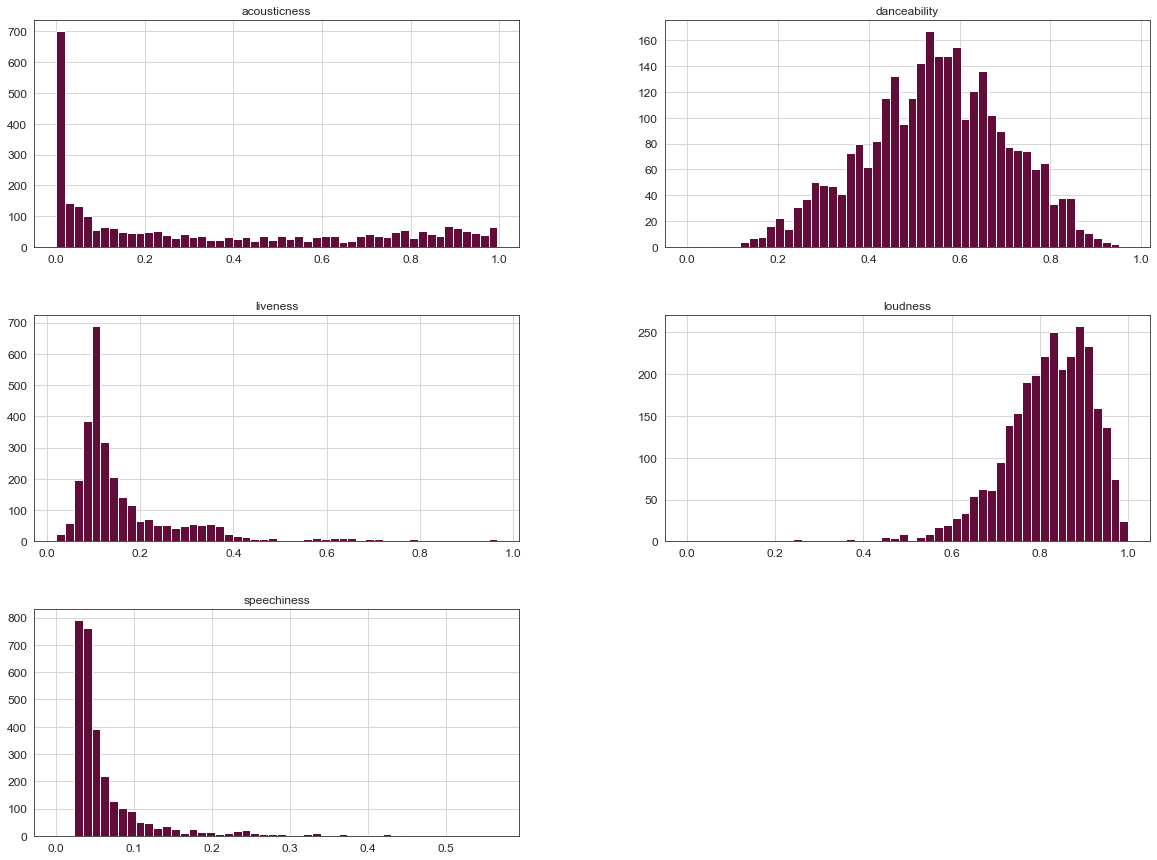

In [44]:
songs.hist(bins=50,figsize=(20,15))

In [45]:
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id'],axis=1)

In [46]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [47]:
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5076157656291582)
For n_clusters = 3, silhouette score is 0.3439260970009315)
For n_clusters = 4, silhouette score is 0.3515592680935808)
For n_clusters = 5, silhouette score is 0.27705440826053485)
For n_clusters = 6, silhouette score is 0.26109266344645127)
For n_clusters = 7, silhouette score is 0.2541265296736787)
For n_clusters = 8, silhouette score is 0.2574450483563815)
For n_clusters = 9, silhouette score is 0.25081062228505957)
For n_clusters = 10, silhouette score is 0.24419931606844789)
For n_clusters = 11, silhouette score is 0.241883121995428)
For n_clusters = 12, silhouette score is 0.23539754480159528)
For n_clusters = 13, silhouette score is 0.23597973803756647)
For n_clusters = 14, silhouette score is 0.2152265079069227)


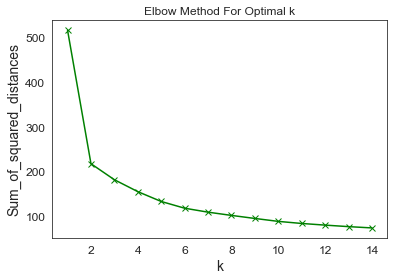

In [48]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [49]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(songs_features)

KMeans()

In [50]:
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

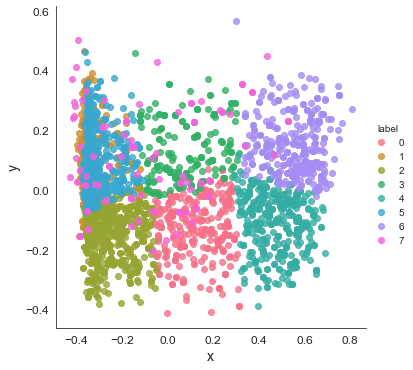

In [51]:

pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [52]:
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

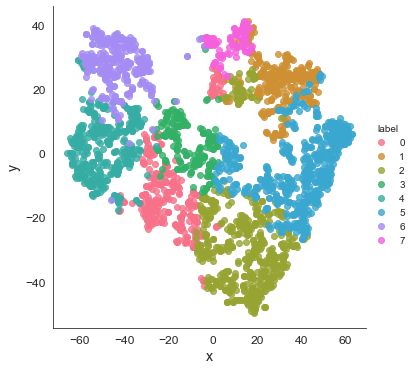

In [53]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [54]:
pca.explained_variance_ratio_

array([0.69392072, 0.1385622 ])

In [55]:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      danceability  loudness  speechiness  acousticness  liveness
PC-1     -0.042347 -0.198992    -0.023744       0.97634 -0.069326
PC-2     -0.968245 -0.011416    -0.054485      -0.02846  0.242060


In [56]:
songs['label'] = y_kmeans

In [57]:
songs = songs.sample(frac=1)
songs['label'].value_counts()

2    596
5    590
4    416
6    340
0    327
1    310
3    210
7    100
Name: label, dtype: int64

In [58]:
songs[songs['label'] == 0].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2318,Let Go,Beau Young Prince,5F2AuFzEiuAQD0JVNjVJQz,0.764,0.809305,0.0576,0.463,0.1090,0
2553,Somebody That I Used To Know,Gotye,1qDrWA6lyx8cLECdZE7TV7,0.865,0.859340,0.0371,0.548,0.0989,0
1425,If I Ruled The World,Jamie Cullum,3XPBKMYSf6rwuebwtMtu9R,0.607,0.772390,0.0283,0.356,0.1020,0
1757,Stay Flo,Solange,6GCIYIWUBSLontW6divqsw,0.823,0.854364,0.0278,0.397,0.0821,0
1223,Sanctuary,Joji,3xaugmCyXrVkrDTXbFkMW3,0.552,0.852234,0.1280,0.422,0.3720,0
2334,my strange addiction,Billie Eilish,3Tc57t9l2O8FwQZtQOvPXK,0.939,0.752349,0.3540,0.350,0.1050,0
1788,Evening Party,Yann Tiersen,78nDPINHHBFURWMMfnLFvw,0.546,0.716605,0.0253,0.475,0.2200,0
92,Me Leva,Phill Veras,4Pf4pygB5mb8PtEr1SMK1u,0.628,0.729433,0.0328,0.479,0.0873,0
1631,Location,Khalid,152lZdxL1OR0ZMW6KquMif,0.736,0.738775,0.4250,0.330,0.0898,0
1378,When It Hurts You,The Paper Kites,5n9OJByf2SpEUEiBkMZODF,0.578,0.914646,0.0306,0.334,0.2740,0


In [59]:
songs[songs['label'] == 1].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
1591,Freaking Out the Neighborhood,Mac DeMarco,25SJaCCPiosugnlY53VhRG,0.565,0.890773,0.1080,0.063900,0.386,1
2569,Hero of Our Time,NateWantsToBattle,15277wUzsEKo3bxCIxFLgk,0.534,0.923296,0.0748,0.000051,0.493,1
2259,Afraid,The Neighbourhood,7brQHA2CgQpcMBiOlfiXYb,0.464,0.892316,0.0411,0.008920,0.335,1
247,We Cry,The Script,3hDan0Z3pdxgXhdupXsdup,0.555,0.921300,0.0642,0.047900,0.351,1
1188,PrettyGirlz,WILLOW,3NYq7c5AIUiubPz9UZl82h,0.385,0.804168,0.0525,0.033100,0.636,1
2745,Mind Your Manners (feat. Myles Kennedy and The...,Slash,1GUIPCmLJgbeDljM5wPJlM,0.520,0.979640,0.3660,0.000017,0.271,1
1854,Porcelain,Moby,2oqcM9cd19JrVS9jAvciUm,0.551,0.834269,0.0294,0.001330,0.282,1
1015,End of The niGht.,Phony Ppl,2p4ARx5nk3b9Jh07ivQR1c,0.809,0.846885,0.0837,0.061800,0.469,1
2452,The End,Zero 9:36,1YaB0iZV5u5cXEI4VJR4cl,0.562,0.931014,0.0892,0.004010,0.361,1
2353,Pretty Boy,The Neighbourhood,6Q5mJdY0XcBLNVq9NLZuto,0.578,0.738722,0.0278,0.208000,0.307,1


In [60]:
songs[songs['label'] == 2].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2705,Day Tripper - Remastered 2009,The Beatles,7qbRP2jO0Sq3kTYdEW1v00,0.643,0.760972,0.0299,0.104000,0.2740,2
2404,Hollywood (feat. Snoop Dogg & Jamie Principle),Gorillaz,0P2Dxoy0mdzM9NlFQoLZbc,0.685,0.768690,0.0926,0.024900,0.2110,2
328,Yoko,Terno Rei,7sdSvGV4jqP4uqFSLxzfKj,0.656,0.814521,0.0278,0.247000,0.1620,2
2500,Kansas,Gorillaz,7FJ7lHtpbWvPKe3zCoeAWC,0.641,0.872089,0.0272,0.072500,0.1750,2
1600,Original (from Dolittle),Sia,0YoquWDxpwAq8jFPj3K8wp,0.677,0.881298,0.0323,0.003150,0.1140,2
1760,Binz,Solange,7yvdp8dqmxExSJwT2fn6Xq,0.863,0.875549,0.3130,0.101000,0.1660,2
1855,You Can't Save Me,SiR,5LKzqs734Xs528hqK8bGS1,0.622,0.833817,0.1220,0.062800,0.1190,2
410,Beautiful,Snoop Dogg,7FrJV8tydWEv1Mxu2mIQrm,0.907,0.877013,0.1350,0.246000,0.0808,2
119,The Reeling,Passion Pit,5noQJkpVfHt2D4df2GXieV,0.597,0.893780,0.0668,0.000356,0.1690,2
1590,This Charming Man - 2011 Remaster,The Smiths,1FvDJ9KGxcqwv1utyPL3JZ,0.611,0.886807,0.0436,0.005090,0.0784,2


In [61]:
songs[songs['label'] == 3].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
1112,Pink Moon,Tash Sultana,1FGrw8CHZlMcMWzck3oCng,0.280,0.794853,0.0308,0.539,0.1800,3
2345,watch,Billie Eilish,7eB1V5LvAdxCc7brfGhRRo,0.441,0.804700,0.2250,0.333,0.1030,3
1440,Never Be Like You,Flume,12REd1n8PeiHHWOh066tpr,0.494,0.898917,0.0565,0.436,0.1640,3
1254,Supernós,Valter Lobo,2dz4wo36Kk45IAZZwdSela,0.329,0.738216,0.0319,0.202,0.1470,3
901,Immature - Mark Bell's Version,Björk,07GGbKqM9rBCv8sGFwpp3Q,0.413,0.851755,0.0412,0.368,0.0977,3
763,Coma,Tash Sultana,4HEYYqHkzjJnIxeydqbbcS,0.149,0.824661,0.0439,0.508,0.1370,3
708,Moonlight,Everything Everything,6t4lW8CBOowqFk8RUCfjsf,0.328,0.802012,0.0333,0.270,0.1090,3
619,Like A Bird,WILLOW,4dyWgfMl31gv7vv19Tok4D,0.349,0.820563,0.0300,0.469,0.1530,3
147,Creases,Grady,4ootnwx6kNm9jRd3hu0qRr,0.419,0.910468,0.0776,0.330,0.1990,3
2408,The Pink Phantom (feat. Elton John and 6LACK),Gorillaz,6XyFC44z3MyVMd5ZrctiWL,0.485,0.826764,0.0348,0.498,0.0607,3


In [62]:
songs[songs['label'] == 4].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
1955,L'Autre valse d'Amélie,Yann Tiersen,1Q5xCiIrNlXj4XQMuSHAWM,0.515,0.789849,0.0275,0.706,0.1370,4
5,"She Plays Bass - Live from Abbey Road Studios,...",beabadoobee,4JVJTPbpj8uzcJ4UY8eFiU,0.503,0.733319,0.0308,0.825,0.1710,4
2119,Good Dancers,Emmy Curl,2sNeOmgHQYwDjUAe2Og3GR,0.537,0.574934,0.0385,0.741,0.2070,4
213,Dragonball Durag,Thundercat,62PclpoBFLl50PJpiJA5RT,0.648,0.786629,0.0942,0.697,0.1110,4
1109,Big Smoke Pt 1 - Live,Tash Sultana,3T91odFDhMVCNrpIKlnLag,0.586,0.736806,0.1430,0.667,0.3670,4
554,Beautiful People Beautiful Problems (feat. Ste...,Lana Del Rey,3O7p9Itz8PXUoAjD2vmuM6,0.509,0.820616,0.0325,0.834,0.0927,4
1679,Song of Origin,Emmy Curl,0hOaKA23z85isL4Yx5po2P,0.562,0.808213,0.0261,0.776,0.1880,4
1466,Baby I'm Yours,Breakbot,0tZkVZ9DeAa0MNK2gY5NtV,0.829,0.943896,0.0668,0.726,0.1220,4
2110,Clarity,Emmy Curl,1BjuMOOWTt2vUqpPte4vFv,0.539,0.758231,0.0305,0.695,0.1160,4
1262,Perdoa,ANAVITÓRIA,7HZKPjrStKgnQSigwWEvia,0.676,0.777313,0.0734,0.722,0.1440,4


In [63]:
songs[songs['label'] == 5].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2429,What It Takes,Adelitas Way,5f7CQQlWscLYxkdzaKWx5Q,0.516,0.927847,0.0755,0.001440,0.0940,5
46,"Hey Look Ma, I Made It",Panic! At The Disco,22oEJW6r2rMb9z4IntfyEa,0.577,0.955021,0.0695,0.013700,0.1210,5
2762,Riot,Three Days Grace,5eALoO9RRACvoxvLKF9zt4,0.185,0.940250,0.1470,0.010400,0.1050,5
2356,A Little Death,The Neighbourhood,0Ot6e3wYVQQ1Us9PM977jE,0.530,0.918425,0.0332,0.002600,0.1050,5
2447,Who I Am,The Score,4zIJHigfguvdm3O8c9KPeo,0.547,0.905251,0.0335,0.011300,0.1500,5
2881,People,Biffy Clyro,0TtpeO0865klh7jWFNlsPF,0.359,0.881724,0.0439,0.079900,0.1890,5
2856,That Golden Rule,Biffy Clyro,5W2qdWVMLheEl0nLnQktuW,0.515,0.885104,0.0499,0.000359,0.0421,5
299,Definitely You,Feed Me Jack,7zT9cOgy2MucVd22XmXb1z,0.497,0.862055,0.0465,0.079000,0.1220,5
945,Something Against You,Pixies,0W1M8vt5AoAidBEah3NE0H,0.213,0.734490,0.0850,0.002270,0.0896,5
2862,Cloud of Stink,Biffy Clyro,19NZ7nI9liP0A3suLrmo7U,0.445,0.867564,0.0516,0.000370,0.0906,5


In [64]:
songs[songs['label'] == 6].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
558,(She's) Just a Phase,Puma Blue,0NfKkSlUJWTbECFqrO0bp1,0.423,0.764698,0.0530,0.702,0.1460,6
1695,Hideaway,Jacob Collier,00BTDWR6xCaGdst6cPKkpF,0.390,0.640886,0.0529,0.744,0.0771,6
2549,Say You Won't Let Go,James Arthur,5uCax9HTNlzGybIStD3vDh,0.358,0.846938,0.0590,0.695,0.0902,6
375,Satellite,Maggie Rogers,5c8XWx56CrCGLv8i1k6XVA,0.186,0.810875,0.0327,0.902,0.1100,6
1417,Cherry Wine - Live,Hozier,4Q66chx9WzqWcLItXoZ5r4,0.418,0.648657,0.0389,0.953,0.0982,6
2040,I Giorni,Ludovico Einaudi,0VLascXUZ2Ze2u5kUD5J1f,0.277,0.239800,0.0545,0.992,0.0712,6
1554,The Gate,Caroline Polachek,7zEFT8tRNy9B7I0F9OeNd0,0.176,0.779629,0.0351,0.890,0.1240,6
1834,Quem Me Dera,Valter Lobo,4m1KsLnr0vI8nntJnsrXTI,0.414,0.724935,0.0339,0.936,0.1080,6
1203,Pyramid Song,Radiohead,3A9vIxzGBjEfqmDK7H9exS,0.127,0.822985,0.0329,0.786,0.1110,6
1171,Seigfried,Frank Ocean,1BViPjTT585XAhkUUrkts0,0.377,0.746680,0.0387,0.975,0.1020,6


In [65]:
songs[songs['label'] == 7].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
1707,Rise,WILLOW,0gxVuBfUu1TbmFyJZwK6X0,0.321,0.699944,0.0320,0.728000,0.660,7
1658,Sometimes,Zilo,1ruyS90EHWbSisSI1jyH8p,0.589,0.831741,0.4630,0.477000,0.568,7
2805,Don't Stay,Linkin Park,2yss0n7KmvmSr4EHvjfFpn,0.488,0.961435,0.1080,0.001530,0.911,7
487,Girls Need Love,Summer Walker,644rGY6maSElnKVsAg1gJj,0.645,0.775956,0.2900,0.558000,0.562,7
145,Amour T'es La,Snarky Puppy,4MIXgItmCtVLCnT4BvU5tU,0.511,0.741783,0.1830,0.211000,0.733,7
782,Seven,Thundercat,1yTchZY8agOgavp18uw8jw,0.744,0.767892,0.0757,0.017000,0.631,7
405,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,4iJyoBOLtHqaGxP12qzhQI,0.677,0.879328,0.1190,0.321000,0.420,7
2392,Superfast Jellyfish (feat. Gruff Rhys and De L...,Gorillaz,1UJNbgfTzG1gZZTWFJdMf1,0.705,0.916962,0.2870,0.059800,0.907,7
150,Waves,Guthrie Govan,7M6vyvf2iByhXCg9qHTrk8,0.319,0.901259,0.1870,0.000166,0.958,7
246,Before the Worst,The Script,1DOOo1ZgHE8vhi2eXKDOLn,0.588,0.931227,0.0435,0.141000,0.655,7


In [66]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels


X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
y_pred = rfc.predict(X_test)

In [68]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 94   0   0   2   2   0   0   0]
 [  0  93   3   0   0   2   0   0]
 [  1   0 192   0   0   0   0   0]
 [  1   0   0  68   0   1   1   0]
 [  0   0   0   0 139   0   1   0]
 [  0   2   1   1   0 199   0   0]
 [  0   0   0   0   1   0 111   0]
 [  0   0   0   0   0   0   0  39]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

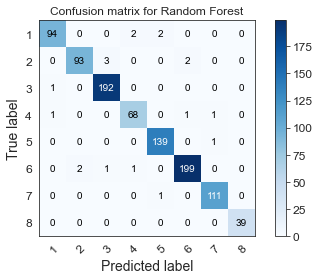

In [69]:
definitions=['1','2','3','4','5','6','7','8']

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [70]:
import pickle

with open('MOODAI.pickle','wb') as fe_data_file:
     pickle.dump(rfc, fe_data_file)

In [71]:
#Code Example
#Import the module
#import pickle
#Load the data - No need to do Feature Engineering again
#with open('fe_data.pickle','rb') as fe_data_file:
#     feature_engineered_data = pickle.load(fe_data_file)
#Continue with your modeling